In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Loading dataset
data=pd.read_excel("C:/Users/risha/Downloads/Data1.xlsx")

In [3]:
data.head()

,Variable 1,Variable 2,Class
0,1.9743,4.6057,1
1,2.2853,3.8689,1
2,2.9881,4.5751,1
3,2.9420,3.5619,1
4,3.5872,2.8660,1


In [4]:
tr=data.to_numpy()
X=tr[:,0:2]

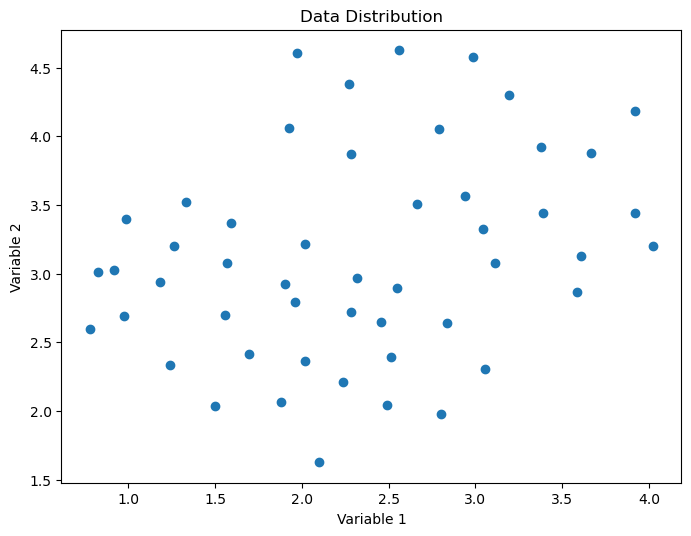

In [5]:
#plotting data
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data Distribution")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

In [6]:
#Assigning class to data points
def update_assignments(data, centroids):
    c = []
    for i in data:
        c.append(np.argmin(np.sqrt(np.sum((i.reshape((1, 2)) - centroids) ** 2, axis=1))))
    return c

In [7]:
#Updating centroids
def update_centroids(data, num_clusters, assignments):
    cen = []
    for c in range(len(num_clusters)):
        cen.append(np.mean([data[x] for x in range(len(data)) if assignments[x] == c], axis=0))
    return cen

In [8]:
#Stopping criteria
def stop_criteria(old_centroids, new_centroids, thres=1e-5):
    total_movement=0
    total_movement=np.sqrt(np.sum((old_centroids - new_centroids) ** 2))
#     print(total_movement)
    return total_movement<thres   

In [9]:
#KMeans
def Kmeans(X,k):
    centroids = (np.random.normal(size=(k, 2)) * 0.01) + np.mean(X, axis=0).reshape((1, 2))
    o_centroids=centroids
    while True:
        a = update_assignments(X, centroids)
        centroids = update_centroids(X, centroids, a)
        centroids = np.array(centroids)
#         print(o_centroids, n_centroids)
#         print(stop(o_centroids, n_centroids))
        if stop_criteria(o_centroids, centroids):
            break
        o_centroids=centroids
    return a,centroids        

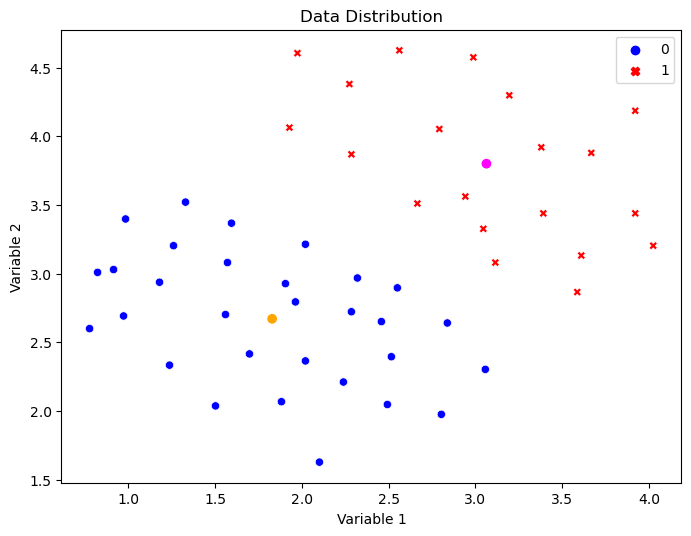

In [10]:
#Plotting
labels, centroids=Kmeans(X,k=2)
labels=np.array(labels)
plt.scatter(centroids[:, 0], centroids[:, 1], color=['orange', 'magenta'])
sns.scatterplot(x=X[:,0], y=X[:, 1], style=labels, hue=labels, palette=['blue', 'red']).set_title("Data Distribution")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

In [12]:
centroids

array([[1.828335, 2.67121 ],
       [3.063565, 3.800865]])